Cenário: mortalidade por mês em 2024 

DATA_ÓBITO           object
NOME_REGIAO          object
NOME_REGIAO_SAUDE    object
MUNICIPIO            object
FAIXA_ETÁRIA         object
ESCOLARIDADE         object
SEXO                 object
RACA                 object
CID                  object
ACIDENTES            object
QUANTIDADE            int64
dtype: object


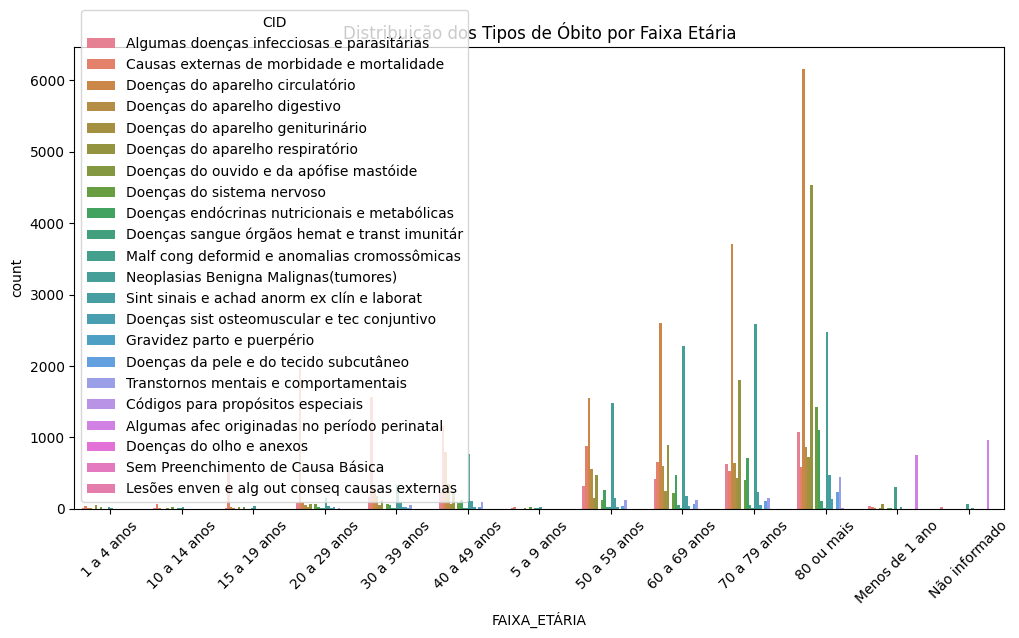

In [1]:
import locale
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')

df = pd.read_csv('cenario-mortalidade-ceara_2024-09-03_19-25-49.csv', encoding='ISO-8859-1', sep=';')
df_grouped = df.groupby(['FAIXA_ETÁRIA', 'CID']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(x='FAIXA_ETÁRIA', y='count', hue='CID', data=df_grouped)
plt.title('Distribuição dos Tipos de Óbito por Faixa Etária')
plt.xticks(rotation=45)
plt.show()




Regressão Logistica com Matriz de Confusão


c:\Users\João Vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\João Vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


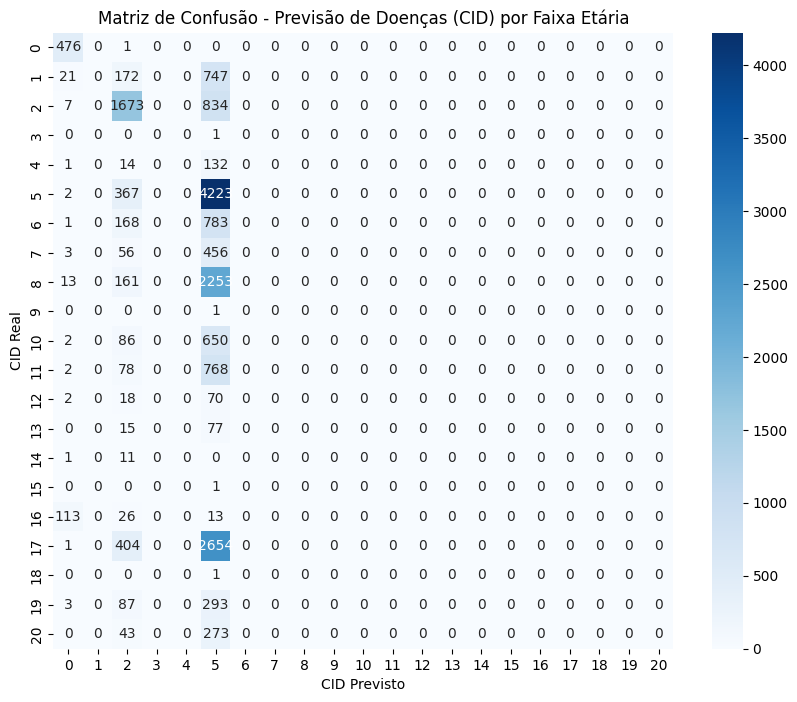

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

df['FAIXA_ETÁRIA'] = LabelEncoder().fit_transform(df['FAIXA_ETÁRIA'])  
df['CID'] = LabelEncoder().fit_transform(df['CID'])  

X = df[['FAIXA_ETÁRIA']]  
y = df['CID']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Previsão de Doenças (CID) por Faixa Etária")
plt.ylabel("CID Real")
plt.xlabel("CID Previsto")
plt.show()

#print(classification_report(y_test, y_pred))


Árvore de decisão

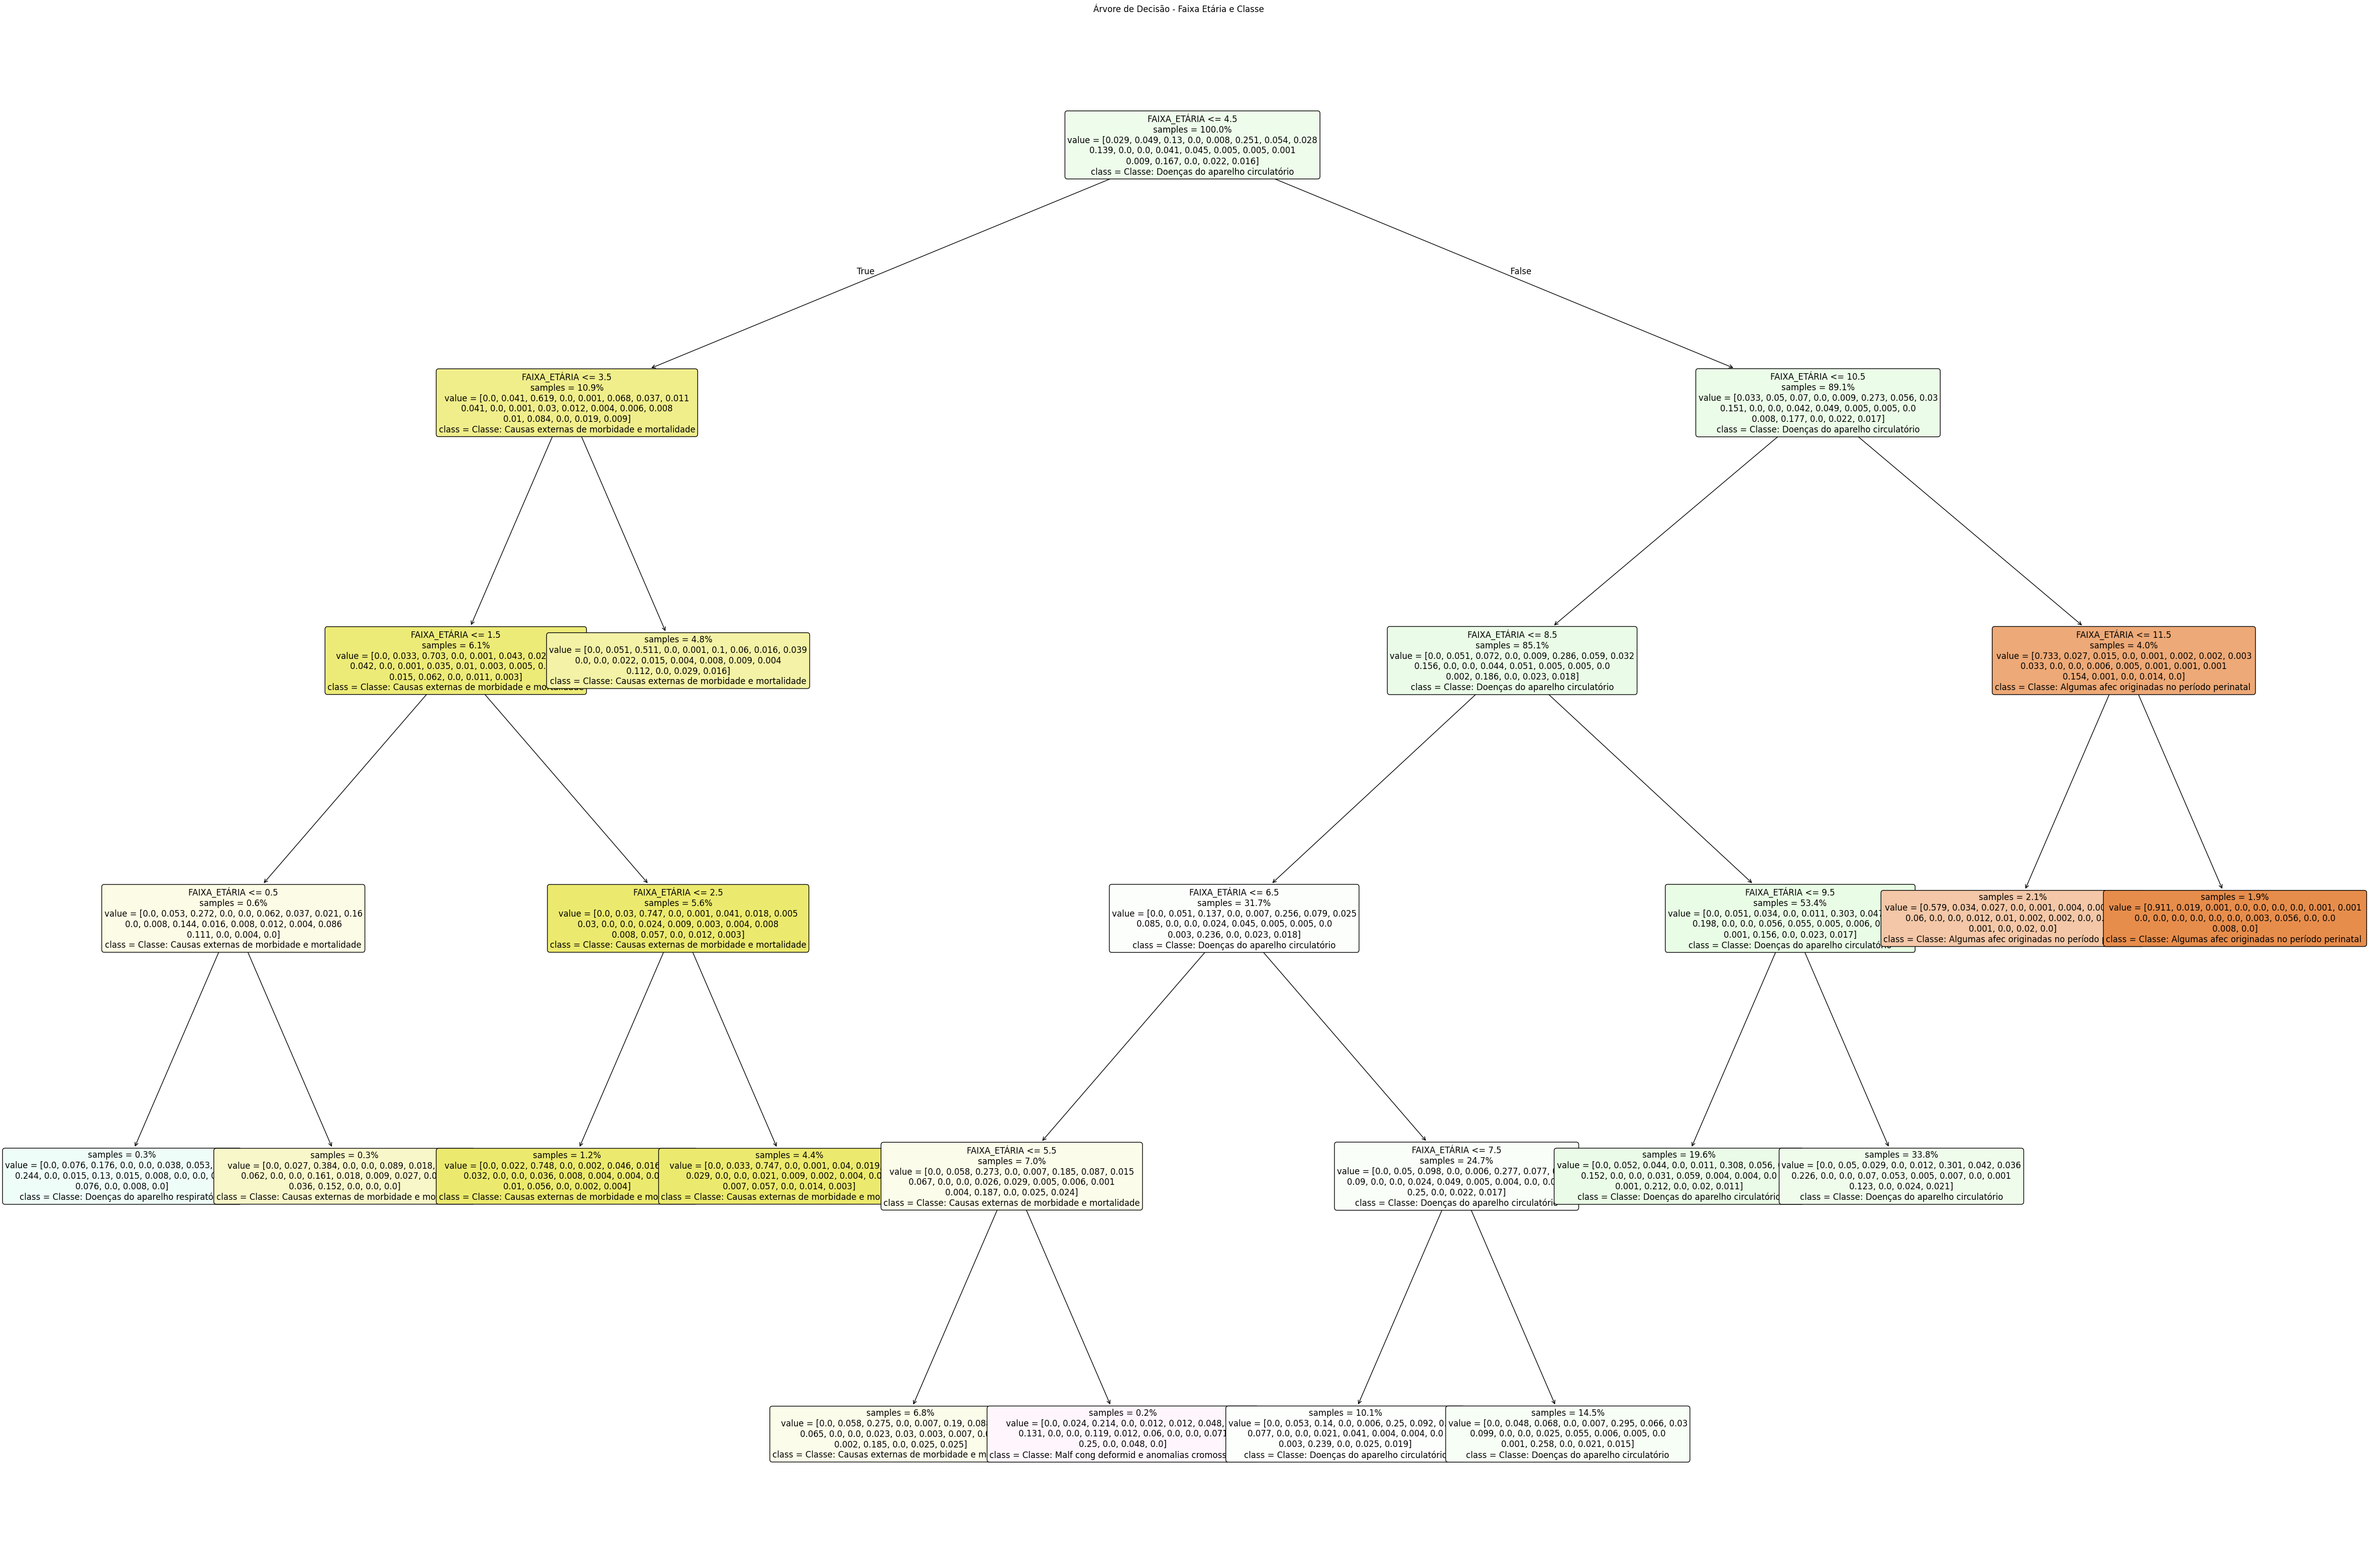

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

df = pd.read_csv('cenario-mortalidade-ceara_2024-09-03_19-25-49.csv', encoding='ISO-8859-1', sep=';')

label_encoder_cid = LabelEncoder()
df['CID'] = label_encoder_cid.fit_transform(df['CID']) 
df['FAIXA_ETÁRIA'] = LabelEncoder().fit_transform(df['FAIXA_ETÁRIA'])  

X = df[['FAIXA_ETÁRIA']]  
y = df['CID']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(60, 40))


tree.plot_tree(tree_model, 
               filled=True, 
               feature_names=['FAIXA_ETÁRIA'], 
               class_names=[f'Classe: {label}' for label in label_encoder_cid.classes_],
               rounded=True, 
               proportion=True,
               impurity=False, 
               fontsize=12)


plt.title("Árvore de Decisão - Faixa Etária e Classe")
plt.show()


Floresta Aleatória com gráfico de barra

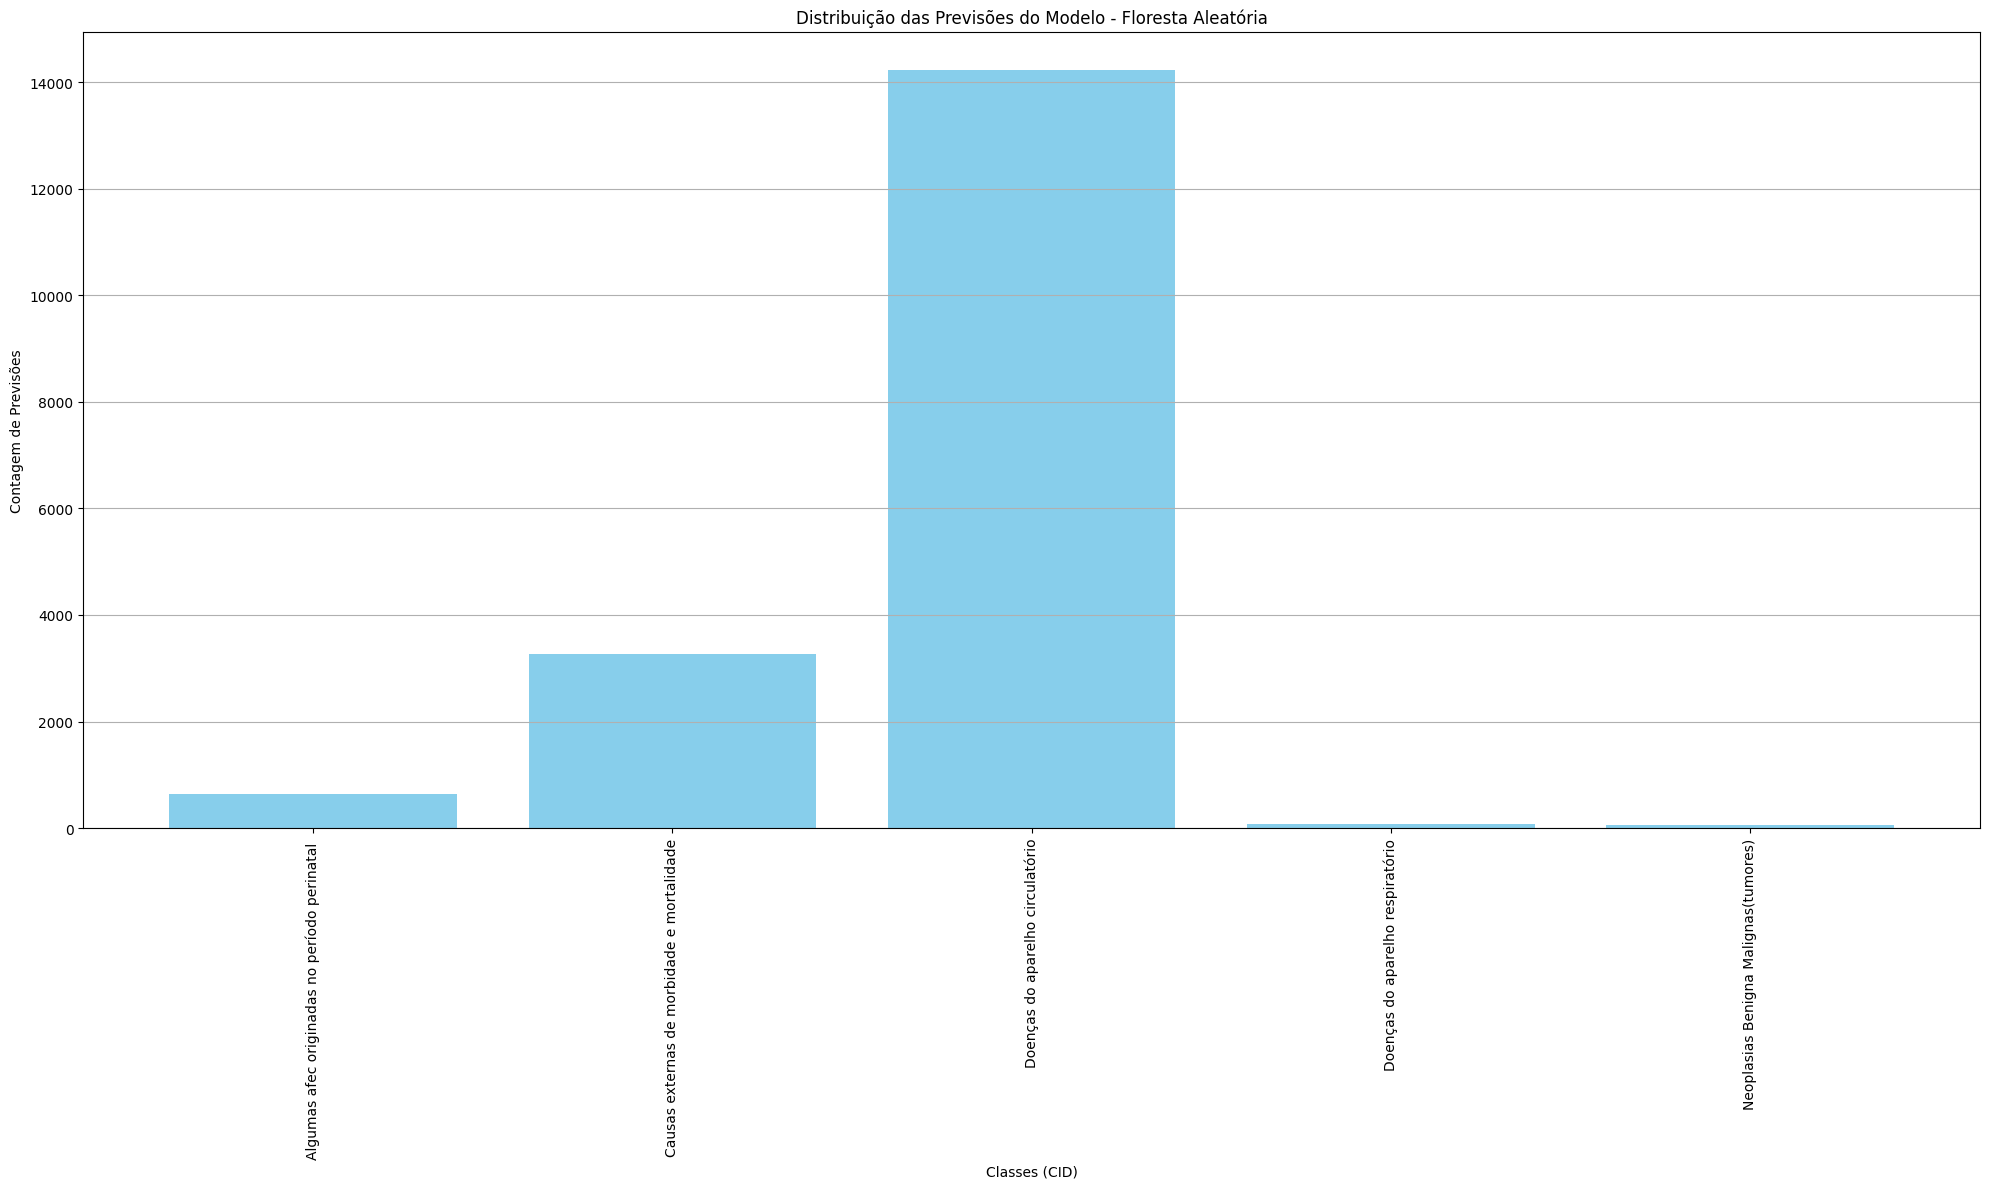

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('cenario-mortalidade-ceara_2024-09-03_19-25-49.csv', encoding='ISO-8859-1', sep=';')

label_encoder_cid = LabelEncoder()
df['CID'] = label_encoder_cid.fit_transform(df['CID'])  
df['FAIXA_ETÁRIA'] = LabelEncoder().fit_transform(df['FAIXA_ETÁRIA'])  

X = df[['FAIXA_ETÁRIA']]  
y = df['CID']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

unique_classes, counts = np.unique(y_pred, return_counts=True)

plt.figure(figsize=(20, 12))
plt.bar(label_encoder_cid.inverse_transform(unique_classes), counts, color='skyblue')
plt.xticks(rotation=90)  
plt.xlabel('Classes (CID)')
plt.ylabel('Contagem de Previsões')
plt.title('Distribuição das Previsões do Modelo - Floresta Aleatória')
plt.grid(axis='y')  
plt.tight_layout()  
plt.show()


Nearest Neighboors usando curva de precisão recall

c:\Users\João Vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\João Vitor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


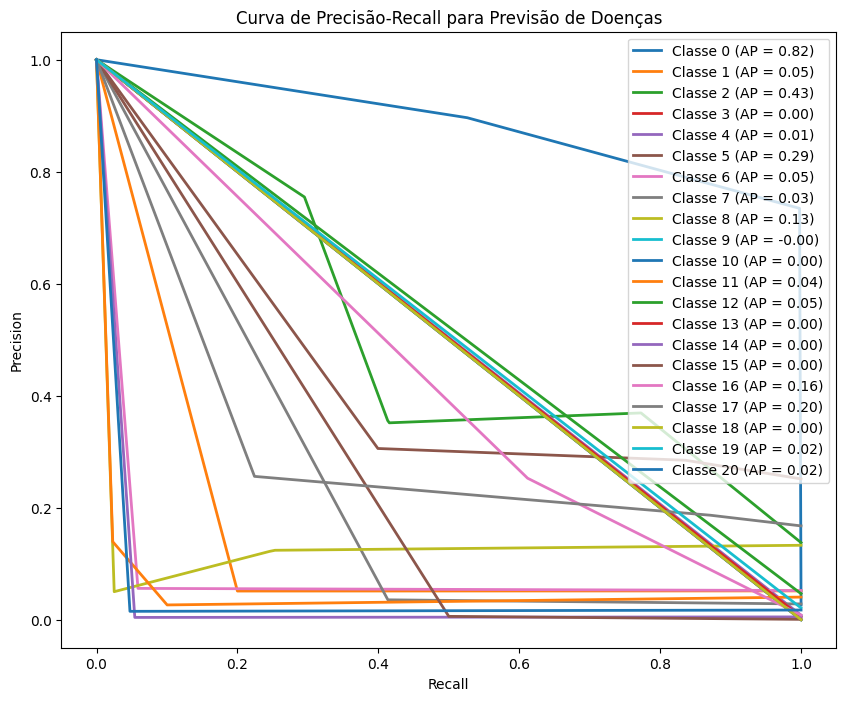

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

df['FAIXA_ETÁRIA'] = LabelEncoder().fit_transform(df['FAIXA_ETÁRIA'])  
df['CID'] = LabelEncoder().fit_transform(df['CID'])  

X = df[['FAIXA_ETÁRIA']]  
y = df['CID']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_score = knn.predict_proba(X_test)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
precision = dict()
recall = dict()
average_precision = dict()
n_classes = y_test_binarized.shape[1]

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label=f'Classe {i} (AP = {average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisão-Recall para Previsão de Doenças')
plt.legend(loc="best")
plt.show()
